## **Import the libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Load and read the Data**

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## **EDA &  visualization**

In [4]:
df.shape

(48842, 15)

In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [7]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [8]:
for col in df.columns:
    print(col)
    print(df[col].mode(), "\n")

age
0    36
Name: age, dtype: int64 

workclass
0    Private
Name: workclass, dtype: object 

fnlwgt
0    203488
Name: fnlwgt, dtype: int64 

education
0    HS-grad
Name: education, dtype: object 

educational-num
0    9
Name: educational-num, dtype: int64 

marital-status
0    Married-civ-spouse
Name: marital-status, dtype: object 

occupation
0    Prof-specialty
Name: occupation, dtype: object 

relationship
0    Husband
Name: relationship, dtype: object 

race
0    White
Name: race, dtype: object 

gender
0    Male
Name: gender, dtype: object 

capital-gain
0    0
Name: capital-gain, dtype: int64 

capital-loss
0    0
Name: capital-loss, dtype: int64 

hours-per-week
0    40
Name: hours-per-week, dtype: int64 

native-country
0    United-States
Name: native-country, dtype: object 

income
0    <=50K
Name: income, dtype: object 



In [9]:
df["gender"].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [10]:
df["race"].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [11]:
df.groupby("gender")["capital-gain"].mean()

gender
Female     580.726285
Male      1326.208300
Name: capital-gain, dtype: float64

In [12]:
df.groupby("gender")["educational-num"].mean()

gender
Female    10.044034
Male      10.094977
Name: educational-num, dtype: float64

In [13]:
df.groupby("gender")["hours-per-week"].mean()

gender
Female    36.400692
Male      42.416845
Name: hours-per-week, dtype: float64

In [14]:
df.groupby("race")["income"].agg(lambda x: x.mode())

race
Amer-Indian-Eskimo    <=50K
Asian-Pac-Islander    <=50K
Black                 <=50K
Other                 <=50K
White                 <=50K
Name: income, dtype: object

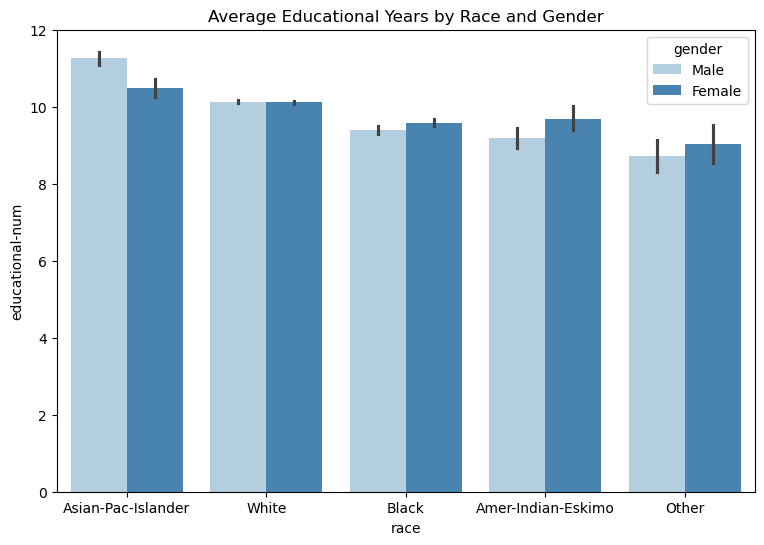

In [15]:
plt.figure(figsize=(9, 6))
sns.barplot(df, x="race", y="educational-num", hue="gender", palette="Blues",
            order=["Asian-Pac-Islander", "White", "Black", "Amer-Indian-Eskimo", "Other"])
plt.title("Average Educational Years by Race and Gender")
plt.show()